# Building The Model With Different Algorithmn 

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
df = pd.read_excel("Processed_Customer_data.xlsx")

In [97]:
df.head()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender,Location
0,1,63,17,73.36,236,0,1,0
1,2,62,1,48.76,172,0,0,1
2,3,24,5,85.47,460,0,0,0
3,4,36,3,97.94,297,1,0,2
4,5,46,19,58.14,266,0,0,2


In [98]:
X = df.drop(columns=["Churn", "CustomerID"])
Y = df["Churn"]

In [99]:
X.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Gender,Location
0,63,17,73.36,236,1,0
1,62,1,48.76,172,0,1
2,24,5,85.47,460,0,0
3,36,3,97.94,297,0,2
4,46,19,58.14,266,0,2


In [100]:
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: Churn, dtype: int64

In [101]:
pos = Y == 1
neg = Y == 0
X_plot = np.array(X)

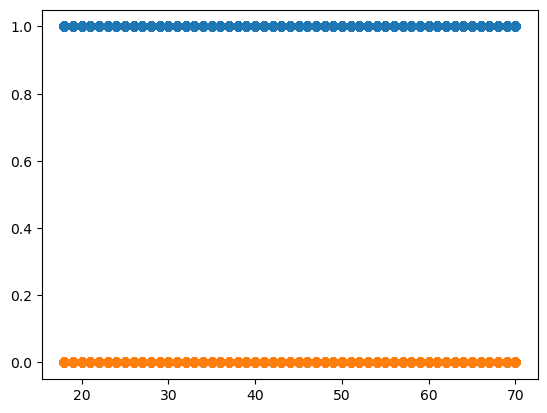

In [102]:
# Visualising The Data With respect to Age Feature
plt.scatter(X_plot[:, 0][pos], Y[pos])
plt.scatter(X_plot[:, 0][neg], Y[neg])

# Train Test Split

In [103]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

In [285]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [286]:
X_train.shape

(70000, 6)

In [287]:
Y_train.shape

(70000,)

# By Neural Network

In [13]:
model1 = Sequential([
    tf.keras.Input(shape=(6,)),
    Dense(units=500, activation='relu', input_shape=(6,)),
    Dense(units=400, activation='relu'),
    Dense(units=300, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [14]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               3500      
                                                                 
 dense_1 (Dense)             (None, 400)               200400    
                                                                 
 dense_2 (Dense)             (None, 300)               120300    
                                                                 
 dense_3 (Dense)             (None, 1)                 301       
                                                                 
Total params: 324501 (1.24 MB)
Trainable params: 324501 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model1.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)
model1.fit(X_train, Y_train, epochs=10, batch_size=100)

Epoch 1/10
700/700 [==============================] - 12s 14ms/step - loss: 121.9569 - accuracy: 0.5008
Epoch 2/10
700/700 [==============================] - 11s 15ms/step - loss: 0.6940 - accuracy: 0.4986
Epoch 3/10
700/700 [==============================] - 10s 14ms/step - loss: 0.6942 - accuracy: 0.5004
Epoch 4/10
700/700 [==============================] - 10s 15ms/step - loss: 0.6941 - accuracy: 0.4999
Epoch 5/10
700/700 [==============================] - 11s 15ms/step - loss: 0.6940 - accuracy: 0.5008
Epoch 6/10
700/700 [==============================] - 11s 15ms/step - loss: 0.6943 - accuracy: 0.4984
Epoch 7/10
700/700 [==============================] - 11s 15ms/step - loss: 0.6941 - accuracy: 0.4984
Epoch 8/10
700/700 [==============================] - 11s 16ms/step - loss: 0.6941 - accuracy: 0.5030
Epoch 9/10
700/700 [==============================] - 11s 16ms/step - loss: 0.6940 - accuracy: 0.5024
Epoch 10/10
700/700 [==============================] - 11s 16ms/step - loss: 0.6

In [16]:
model1.predict(X_test)

938/938 [==============================] - 4s 4ms/step


array([[0.44957244],
       [0.44957244],
       [0.44957244],
       ...,
       [0.44957244],
       [0.44957244],
       [0.44957244]], dtype=float32)

# By Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model2 = LogisticRegression()

In [19]:
model2.fit(X_train, Y_train)

LogisticRegression()

In [20]:
model2.predict(X_test)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [21]:
model2.score(X_test, Y_test)

0.5022333333333333

# By Naiv Bias

In [22]:
from sklearn.naive_bayes import MultinomialNB

model3 = MultinomialNB()
model3.fit(X_train, Y_train)

MultinomialNB()

In [23]:
model3.score(X_train, Y_train)

0.5008

In [24]:
model3.score(X_test, Y_test)

0.49946666666666667

In [25]:
model3.predict(X_test)

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

# By KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1000,algorithm = 'ball_tree')
# knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)

knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1000)

In [27]:
knn.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
knn.score(X_test, Y_test)

0.4988

# By Gradient Descent

In [356]:
class sk_learn:
    
    class LinearRegression:
        def __init__(self, X, Y, alpha, epochs):
            self.X = X
            self.Y = Y
            self.alpha = alpha
            self.epochs = epochs
            self.W = np.zeros(X.shape[1])  # Initialize weights based on number of features
            self.b = 0

        def fit(self):
            X_scaled = self.X / self.X.max(axis=0)  # Scale features individually
            m = len(self.X)

            for i in range(self.epochs):
                y_pred = np.dot(X_scaled, self.W) + self.b  # Use dot product for prediction

                dw = (1/m) * np.dot(X_scaled.T, (y_pred - self.Y))
                db = (1/m) * np.sum(y_pred - self.Y)

                self.W = self.W - self.alpha * dw
                self.b = self.b - self.alpha * db

            self.W = self.W / self.X.max(axis=0)  # Normalize weights


        def coef__(self):
            return self.W

        def intercept__(self):
            return self.b

        def predict(self, X_test):
            return np.dot(X_test, self.W) + self.b

        def bestFitLine(self):
            Y_pred = self.predict(self.X)

            plt.scatter(self.X[:, 0], self.Y)  # Assuming X[:, 0] is the first feature
            plt.plot(self.X[:, 0], Y_pred)
            plt.show()

        def r_squared(self):
            y_pred = self.predict(self.X)
            ss_total = np.sum((self.Y - np.mean(self.Y)) ** 2)
            ss_residual = np.sum((self.Y - y_pred) ** 2)
            r2 = 1 - (ss_residual / ss_total)
            return r2
    
    # ==========================================================================================================
    
    class LogisticRegression:
        def __init__(self, X, Y, alpha, epochs):
            self.X = X
            self.Y = Y
            self.alpha = alpha
            self.epochs = epochs
            self.W = np.zeros(X.shape[1]) 
            self.b = 0
        
        def sigmoid(self, Z):
            return 1/(1+np.exp(-Z))
        
        
        def fit(self):
            m = len(self.X)
            for i in range(self.epochs):
                Z = np.dot(self.W, self.X.T) + self.b
                f_wb = self.sigmoid(Z)
                
                dw = (1/m) * np.dot(self.X.T, (f_wb-self.Y))
                db = (1/m) * np.sum(f_wb - self.Y)
                
                self.W = self.W - self.alpha * dw
                self.b = self.b - self.alpha * db
                
                cost = (-1/m) * np.sum(self.Y * np.log(f_wb) + (1 - self.Y) * np.log(1 - f_wb))
                print(f'Epoch {i+1}, Cost: {cost}')
                
        
        def coef_(self):
            return self.W

        def intercept_(self):
            return self.b
        
        def predict(self, X_test):
            Z =  np.dot(X_test, self.W) + self.b
            y_pred = self.sigmoid(Z)
            return np.round(y_pred)
        
        def boudryLine(self):
            # Calculate the decision boundary
            x1_boundary = np.linspace(min(self.X[:, 0]), max(self.X[:, 0]), 100)  # Assuming x has shape (num_samples, num_features)
            x2_boundary = (-self.W[0] * x1_boundary - self.b) / self.W[1]

            # Plot the data points
            plt.scatter(self.X[:, 0], self.X[:, 1], c=self.Y, cmap=plt.cm.Paired, label='Data Points')

            # Plot the decision boundary line
            plt.plot(x1_boundary, x2_boundary, color='green', label='Decision Boundary')


            plt.xlabel('Feature 1')
            plt.ylabel('Feature 2')
            plt.title('Logistic Regression Decision Boundary')
            plt.legend()
            plt.show()

In [357]:
Xg_train = np.array(X_train)
Xg_test = np.array(X_test)

Xg_train = Xg_train/Xg_train.max()
Xg_test = Xg_test/Xg_test.max()

In [380]:
model = sk_learn.LogisticRegression(Xg_train, Y_train, 5.9, 10000)
model.fit()

Epoch 1, Cost: 0.6931471805599453
Epoch 2, Cost: 0.6931465598114981
Epoch 3, Cost: 0.6931459976815109
Epoch 4, Cost: 0.6931454878765625
Epoch 5, Cost: 0.6931450229410075
Epoch 6, Cost: 0.6931445983964114
Epoch 7, Cost: 0.6931442085526561
Epoch 8, Cost: 0.6931438502354564
Epoch 9, Cost: 0.6931435190658014
Epoch 10, Cost: 0.693143212804354
Epoch 11, Cost: 0.6931429280500829
Epoch 12, Cost: 0.6931426632320656
Epoch 13, Cost: 0.6931424156825535
Epoch 14, Cost: 0.6931421843068846
Epoch 15, Cost: 0.6931419669904181
Epoch 16, Cost: 0.6931417629764534
Epoch 17, Cost: 0.69314157057041
Epoch 18, Cost: 0.6931413892542111
Epoch 19, Cost: 0.6931412176547534
Epoch 20, Cost: 0.6931410554214057
Epoch 21, Cost: 0.6931409014292034
Epoch 22, Cost: 0.6931407554441136
Epoch 23, Cost: 0.6931406165344928
Epoch 24, Cost: 0.6931404845467158
Epoch 25, Cost: 0.6931403587012632
Epoch 26, Cost: 0.6931402388992779
Epoch 27, Cost: 0.6931401244822073
Epoch 28, Cost: 0.6931400153878989
Epoch 29, Cost: 0.69313991105503

Epoch 242, Cost: 0.6931370162352908
Epoch 243, Cost: 0.6931370136657592
Epoch 244, Cost: 0.6931370110991266
Epoch 245, Cost: 0.6931370085353661
Epoch 246, Cost: 0.693137005974452
Epoch 247, Cost: 0.6931370034163596
Epoch 248, Cost: 0.6931370008610647
Epoch 249, Cost: 0.6931369983085438
Epoch 250, Cost: 0.6931369957587745
Epoch 251, Cost: 0.693136993211735
Epoch 252, Cost: 0.693136990667404
Epoch 253, Cost: 0.6931369881257607
Epoch 254, Cost: 0.6931369855867857
Epoch 255, Cost: 0.6931369830504593
Epoch 256, Cost: 0.6931369805167633
Epoch 257, Cost: 0.6931369779856789
Epoch 258, Cost: 0.6931369754571889
Epoch 259, Cost: 0.6931369729312761
Epoch 260, Cost: 0.6931369704079237
Epoch 261, Cost: 0.6931369678871159
Epoch 262, Cost: 0.6931369653688367
Epoch 263, Cost: 0.6931369628530711
Epoch 264, Cost: 0.6931369603398043
Epoch 265, Cost: 0.6931369578290217
Epoch 266, Cost: 0.6931369553207091
Epoch 267, Cost: 0.6931369528148535
Epoch 268, Cost: 0.6931369503114411
Epoch 269, Cost: 0.693136947810

Epoch 472, Cost: 0.693136481252253
Epoch 473, Cost: 0.6931364791281355
Epoch 474, Cost: 0.6931364770055185
Epoch 475, Cost: 0.6931364748843999
Epoch 476, Cost: 0.693136472764777
Epoch 477, Cost: 0.6931364706466474
Epoch 478, Cost: 0.6931364685300091
Epoch 479, Cost: 0.6931364664148593
Epoch 480, Cost: 0.693136464301196
Epoch 481, Cost: 0.6931364621890163
Epoch 482, Cost: 0.6931364600783183
Epoch 483, Cost: 0.6931364579690994
Epoch 484, Cost: 0.6931364558613574
Epoch 485, Cost: 0.6931364537550899
Epoch 486, Cost: 0.6931364516502948
Epoch 487, Cost: 0.6931364495469694
Epoch 488, Cost: 0.6931364474451115
Epoch 489, Cost: 0.6931364453447191
Epoch 490, Cost: 0.6931364432457896
Epoch 491, Cost: 0.6931364411483206
Epoch 492, Cost: 0.6931364390523103
Epoch 493, Cost: 0.693136436957756
Epoch 494, Cost: 0.6931364348646556
Epoch 495, Cost: 0.693136432773007
Epoch 496, Cost: 0.6931364306828075
Epoch 497, Cost: 0.6931364285940553
Epoch 498, Cost: 0.6931364265067483
Epoch 499, Cost: 0.69313642442088

Epoch 720, Cost: 0.6931359954505684
Epoch 721, Cost: 0.6931359936414963
Epoch 722, Cost: 0.6931359918335159
Epoch 723, Cost: 0.6931359900266256
Epoch 724, Cost: 0.6931359882208246
Epoch 725, Cost: 0.6931359864161116
Epoch 726, Cost: 0.6931359846124856
Epoch 727, Cost: 0.6931359828099455
Epoch 728, Cost: 0.6931359810084897
Epoch 729, Cost: 0.693135979208118
Epoch 730, Cost: 0.6931359774088286
Epoch 731, Cost: 0.6931359756106209
Epoch 732, Cost: 0.6931359738134933
Epoch 733, Cost: 0.6931359720174454
Epoch 734, Cost: 0.6931359702224754
Epoch 735, Cost: 0.6931359684285826
Epoch 736, Cost: 0.6931359666357659
Epoch 737, Cost: 0.6931359648440243
Epoch 738, Cost: 0.6931359630533566
Epoch 739, Cost: 0.6931359612637615
Epoch 740, Cost: 0.6931359594752385
Epoch 741, Cost: 0.693135957687786
Epoch 742, Cost: 0.6931359559014034
Epoch 743, Cost: 0.6931359541160893
Epoch 744, Cost: 0.6931359523318429
Epoch 745, Cost: 0.6931359505486627
Epoch 746, Cost: 0.6931359487665482
Epoch 747, Cost: 0.69313594698

Epoch 960, Cost: 0.6931355903704942
Epoch 961, Cost: 0.6931355887967334
Epoch 962, Cost: 0.693135587223859
Epoch 963, Cost: 0.69313558565187
Epoch 964, Cost: 0.693135584080766
Epoch 965, Cost: 0.6931355825105464
Epoch 966, Cost: 0.6931355809412102
Epoch 967, Cost: 0.6931355793727572
Epoch 968, Cost: 0.6931355778051863
Epoch 969, Cost: 0.6931355762384971
Epoch 970, Cost: 0.6931355746726887
Epoch 971, Cost: 0.693135573107761
Epoch 972, Cost: 0.6931355715437125
Epoch 973, Cost: 0.6931355699805433
Epoch 974, Cost: 0.6931355684182523
Epoch 975, Cost: 0.6931355668568393
Epoch 976, Cost: 0.693135565296303
Epoch 977, Cost: 0.6931355637366433
Epoch 978, Cost: 0.6931355621778593
Epoch 979, Cost: 0.6931355606199504
Epoch 980, Cost: 0.6931355590629158
Epoch 981, Cost: 0.6931355575067554
Epoch 982, Cost: 0.6931355559514677
Epoch 983, Cost: 0.6931355543970529
Epoch 984, Cost: 0.6931355528435098
Epoch 985, Cost: 0.6931355512908379
Epoch 986, Cost: 0.6931355497390367
Epoch 987, Cost: 0.693135548188105

Epoch 1189, Cost: 0.6931352519088442
Epoch 1190, Cost: 0.6931352505224984
Epoch 1191, Cost: 0.6931352491369092
Epoch 1192, Cost: 0.6931352477520764
Epoch 1193, Cost: 0.693135246367999
Epoch 1194, Cost: 0.693135244984677
Epoch 1195, Cost: 0.69313524360211
Epoch 1196, Cost: 0.6931352422202974
Epoch 1197, Cost: 0.6931352408392384
Epoch 1198, Cost: 0.6931352394589329
Epoch 1199, Cost: 0.69313523807938
Epoch 1200, Cost: 0.6931352367005796
Epoch 1201, Cost: 0.6931352353225311
Epoch 1202, Cost: 0.6931352339452339
Epoch 1203, Cost: 0.6931352325686877
Epoch 1204, Cost: 0.693135231192892
Epoch 1205, Cost: 0.6931352298178463
Epoch 1206, Cost: 0.6931352284435499
Epoch 1207, Cost: 0.6931352270700026
Epoch 1208, Cost: 0.6931352256972039
Epoch 1209, Cost: 0.6931352243251532
Epoch 1210, Cost: 0.69313522295385
Epoch 1211, Cost: 0.6931352215832939
Epoch 1212, Cost: 0.6931352202134845
Epoch 1213, Cost: 0.6931352188444212
Epoch 1214, Cost: 0.6931352174761035
Epoch 1215, Cost: 0.693135216108531
Epoch 1216,

Epoch 1416, Cost: 0.6931349557341385
Epoch 1417, Cost: 0.693134954507978
Epoch 1418, Cost: 0.6931349532824752
Epoch 1419, Cost: 0.6931349520576296
Epoch 1420, Cost: 0.6931349508334409
Epoch 1421, Cost: 0.6931349496099086
Epoch 1422, Cost: 0.6931349483870324
Epoch 1423, Cost: 0.6931349471648119
Epoch 1424, Cost: 0.6931349459432469
Epoch 1425, Cost: 0.6931349447223364
Epoch 1426, Cost: 0.6931349435020807
Epoch 1427, Cost: 0.693134942282479
Epoch 1428, Cost: 0.6931349410635311
Epoch 1429, Cost: 0.6931349398452364
Epoch 1430, Cost: 0.6931349386275948
Epoch 1431, Cost: 0.6931349374106055
Epoch 1432, Cost: 0.6931349361942686
Epoch 1433, Cost: 0.6931349349785835
Epoch 1434, Cost: 0.6931349337635497
Epoch 1435, Cost: 0.6931349325491669
Epoch 1436, Cost: 0.6931349313354347
Epoch 1437, Cost: 0.6931349301223526
Epoch 1438, Cost: 0.6931349289099206
Epoch 1439, Cost: 0.6931349276981378
Epoch 1440, Cost: 0.6931349264870043
Epoch 1441, Cost: 0.6931349252765192
Epoch 1442, Cost: 0.6931349240666825
Epo

Epoch 1640, Cost: 0.6931346968016158
Epoch 1641, Cost: 0.6931346957134635
Epoch 1642, Cost: 0.6931346946258877
Epoch 1643, Cost: 0.6931346935388882
Epoch 1644, Cost: 0.6931346924524644
Epoch 1645, Cost: 0.6931346913666158
Epoch 1646, Cost: 0.6931346902813424
Epoch 1647, Cost: 0.6931346891966437
Epoch 1648, Cost: 0.6931346881125193
Epoch 1649, Cost: 0.6931346870289692
Epoch 1650, Cost: 0.6931346859459927
Epoch 1651, Cost: 0.6931346848635896
Epoch 1652, Cost: 0.6931346837817597
Epoch 1653, Cost: 0.6931346827005025
Epoch 1654, Cost: 0.6931346816198175
Epoch 1655, Cost: 0.6931346805397047
Epoch 1656, Cost: 0.6931346794601637
Epoch 1657, Cost: 0.6931346783811942
Epoch 1658, Cost: 0.6931346773027957
Epoch 1659, Cost: 0.6931346762249678
Epoch 1660, Cost: 0.6931346751477103
Epoch 1661, Cost: 0.6931346740710231
Epoch 1662, Cost: 0.6931346729949058
Epoch 1663, Cost: 0.6931346719193575
Epoch 1664, Cost: 0.6931346708443786
Epoch 1665, Cost: 0.6931346697699684
Epoch 1666, Cost: 0.6931346686961265
E

Epoch 1879, Cost: 0.6931344524032828
Epoch 1880, Cost: 0.6931344514438476
Epoch 1881, Cost: 0.6931344504849145
Epoch 1882, Cost: 0.6931344495264835
Epoch 1883, Cost: 0.6931344485685544
Epoch 1884, Cost: 0.6931344476111264
Epoch 1885, Cost: 0.6931344466541998
Epoch 1886, Cost: 0.6931344456977738
Epoch 1887, Cost: 0.6931344447418487
Epoch 1888, Cost: 0.6931344437864235
Epoch 1889, Cost: 0.6931344428314984
Epoch 1890, Cost: 0.6931344418770732
Epoch 1891, Cost: 0.6931344409231471
Epoch 1892, Cost: 0.6931344399697205
Epoch 1893, Cost: 0.6931344390167926
Epoch 1894, Cost: 0.6931344380643634
Epoch 1895, Cost: 0.6931344371124324
Epoch 1896, Cost: 0.6931344361609991
Epoch 1897, Cost: 0.6931344352100639
Epoch 1898, Cost: 0.693134434259626
Epoch 1899, Cost: 0.693134433309685
Epoch 1900, Cost: 0.6931344323602411
Epoch 1901, Cost: 0.6931344314112938
Epoch 1902, Cost: 0.6931344304628427
Epoch 1903, Cost: 0.6931344295148876
Epoch 1904, Cost: 0.6931344285674281
Epoch 1905, Cost: 0.6931344276204643
Epo

Epoch 2110, Cost: 0.6931342435537406
Epoch 2111, Cost: 0.6931342427030386
Epoch 2112, Cost: 0.6931342418527769
Epoch 2113, Cost: 0.6931342410029554
Epoch 2114, Cost: 0.6931342401535735
Epoch 2115, Cost: 0.6931342393046314
Epoch 2116, Cost: 0.6931342384561283
Epoch 2117, Cost: 0.6931342376080643
Epoch 2118, Cost: 0.6931342367604392
Epoch 2119, Cost: 0.6931342359132524
Epoch 2120, Cost: 0.693134235066504
Epoch 2121, Cost: 0.6931342342201937
Epoch 2122, Cost: 0.6931342333743212
Epoch 2123, Cost: 0.6931342325288862
Epoch 2124, Cost: 0.6931342316838885
Epoch 2125, Cost: 0.6931342308393277
Epoch 2126, Cost: 0.6931342299952039
Epoch 2127, Cost: 0.6931342291515166
Epoch 2128, Cost: 0.6931342283082655
Epoch 2129, Cost: 0.6931342274654506
Epoch 2130, Cost: 0.6931342266230714
Epoch 2131, Cost: 0.6931342257811279
Epoch 2132, Cost: 0.6931342249396194
Epoch 2133, Cost: 0.6931342240985461
Epoch 2134, Cost: 0.6931342232579077
Epoch 2135, Cost: 0.6931342224177038
Epoch 2136, Cost: 0.6931342215779344
Ep

Epoch 2344, Cost: 0.6931340559816472
Epoch 2345, Cost: 0.6931340552274449
Epoch 2346, Cost: 0.6931340544736284
Epoch 2347, Cost: 0.6931340537201971
Epoch 2348, Cost: 0.6931340529671508
Epoch 2349, Cost: 0.6931340522144893
Epoch 2350, Cost: 0.6931340514622124
Epoch 2351, Cost: 0.6931340507103201
Epoch 2352, Cost: 0.693134049958812
Epoch 2353, Cost: 0.6931340492076877
Epoch 2354, Cost: 0.6931340484569473
Epoch 2355, Cost: 0.6931340477065905
Epoch 2356, Cost: 0.693134046956617
Epoch 2357, Cost: 0.6931340462070265
Epoch 2358, Cost: 0.693134045457819
Epoch 2359, Cost: 0.693134044708994
Epoch 2360, Cost: 0.6931340439605516
Epoch 2361, Cost: 0.6931340432124914
Epoch 2362, Cost: 0.6931340424648132
Epoch 2363, Cost: 0.6931340417175169
Epoch 2364, Cost: 0.6931340409706023
Epoch 2365, Cost: 0.6931340402240688
Epoch 2366, Cost: 0.6931340394779166
Epoch 2367, Cost: 0.6931340387321455
Epoch 2368, Cost: 0.6931340379867548
Epoch 2369, Cost: 0.6931340372417448
Epoch 2370, Cost: 0.6931340364971151
Epoch

Epoch 2578, Cost: 0.6931338895618998
Epoch 2579, Cost: 0.6931338888922057
Epoch 2580, Cost: 0.6931338882228496
Epoch 2581, Cost: 0.6931338875538305
Epoch 2582, Cost: 0.6931338868851491
Epoch 2583, Cost: 0.6931338862168044
Epoch 2584, Cost: 0.6931338855487967
Epoch 2585, Cost: 0.6931338848811258
Epoch 2586, Cost: 0.6931338842137914
Epoch 2587, Cost: 0.6931338835467933
Epoch 2588, Cost: 0.6931338828801312
Epoch 2589, Cost: 0.6931338822138052
Epoch 2590, Cost: 0.693133881547815
Epoch 2591, Cost: 0.6931338808821601
Epoch 2592, Cost: 0.6931338802168406
Epoch 2593, Cost: 0.6931338795518565
Epoch 2594, Cost: 0.6931338788872073
Epoch 2595, Cost: 0.6931338782228929
Epoch 2596, Cost: 0.6931338775589131
Epoch 2597, Cost: 0.6931338768952676
Epoch 2598, Cost: 0.6931338762319563
Epoch 2599, Cost: 0.6931338755689794
Epoch 2600, Cost: 0.6931338749063362
Epoch 2601, Cost: 0.6931338742440265
Epoch 2602, Cost: 0.6931338735820503
Epoch 2603, Cost: 0.6931338729204075
Epoch 2604, Cost: 0.6931338722590976
Ep

Epoch 2813, Cost: 0.6931337410727545
Epoch 2814, Cost: 0.6931337404773815
Epoch 2815, Cost: 0.6931337398823041
Epoch 2816, Cost: 0.6931337392875222
Epoch 2817, Cost: 0.6931337386930355
Epoch 2818, Cost: 0.693133738098844
Epoch 2819, Cost: 0.6931337375049476
Epoch 2820, Cost: 0.6931337369113457
Epoch 2821, Cost: 0.6931337363180387
Epoch 2822, Cost: 0.6931337357250259
Epoch 2823, Cost: 0.6931337351323076
Epoch 2824, Cost: 0.6931337345398835
Epoch 2825, Cost: 0.6931337339477533
Epoch 2826, Cost: 0.6931337333559167
Epoch 2827, Cost: 0.6931337327643738
Epoch 2828, Cost: 0.6931337321731245
Epoch 2829, Cost: 0.6931337315821683
Epoch 2830, Cost: 0.6931337309915054
Epoch 2831, Cost: 0.6931337304011355
Epoch 2832, Cost: 0.6931337298110585
Epoch 2833, Cost: 0.6931337292212739
Epoch 2834, Cost: 0.6931337286317817
Epoch 2835, Cost: 0.6931337280425821
Epoch 2836, Cost: 0.6931337274536744
Epoch 2837, Cost: 0.6931337268650588
Epoch 2838, Cost: 0.6931337262767349
Epoch 2839, Cost: 0.6931337256887026
Ep

Epoch 3041, Cost: 0.6931336126624847
Epoch 3042, Cost: 0.6931336121303715
Epoch 3043, Cost: 0.6931336115985185
Epoch 3044, Cost: 0.693133611066925
Epoch 3045, Cost: 0.6931336105355912
Epoch 3046, Cost: 0.6931336100045168
Epoch 3047, Cost: 0.6931336094737018
Epoch 3048, Cost: 0.6931336089431459
Epoch 3049, Cost: 0.693133608412849
Epoch 3050, Cost: 0.693133607882811
Epoch 3051, Cost: 0.6931336073530318
Epoch 3052, Cost: 0.693133606823511
Epoch 3053, Cost: 0.693133606294249
Epoch 3054, Cost: 0.6931336057652447
Epoch 3055, Cost: 0.693133605236499
Epoch 3056, Cost: 0.6931336047080112
Epoch 3057, Cost: 0.6931336041797814
Epoch 3058, Cost: 0.6931336036518091
Epoch 3059, Cost: 0.6931336031240944
Epoch 3060, Cost: 0.693133602596637
Epoch 3061, Cost: 0.6931336020694371
Epoch 3062, Cost: 0.6931336015424943
Epoch 3063, Cost: 0.6931336010158083
Epoch 3064, Cost: 0.6931336004893793
Epoch 3065, Cost: 0.6931335999632069
Epoch 3066, Cost: 0.6931335994372911
Epoch 3067, Cost: 0.6931335989116316
Epoch 30

Epoch 3276, Cost: 0.6931334944586178
Epoch 3277, Cost: 0.6931334939837197
Epoch 3278, Cost: 0.6931334935090491
Epoch 3279, Cost: 0.693133493034606
Epoch 3280, Cost: 0.6931334925603904
Epoch 3281, Cost: 0.6931334920864018
Epoch 3282, Cost: 0.6931334916126407
Epoch 3283, Cost: 0.6931334911391063
Epoch 3284, Cost: 0.6931334906657987
Epoch 3285, Cost: 0.693133490192718
Epoch 3286, Cost: 0.6931334897198638
Epoch 3287, Cost: 0.6931334892472361
Epoch 3288, Cost: 0.6931334887748347
Epoch 3289, Cost: 0.6931334883026593
Epoch 3290, Cost: 0.6931334878307104
Epoch 3291, Cost: 0.6931334873589872
Epoch 3292, Cost: 0.69313348688749
Epoch 3293, Cost: 0.6931334864162182
Epoch 3294, Cost: 0.6931334859451721
Epoch 3295, Cost: 0.6931334854743514
Epoch 3296, Cost: 0.6931334850037563
Epoch 3297, Cost: 0.6931334845333861
Epoch 3298, Cost: 0.6931334840632412
Epoch 3299, Cost: 0.693133483593321
Epoch 3300, Cost: 0.6931334831236257
Epoch 3301, Cost: 0.6931334826541551
Epoch 3302, Cost: 0.693133482184909
Epoch 3

Epoch 3510, Cost: 0.6931333892755767
Epoch 3511, Cost: 0.6931333888505906
Epoch 3512, Cost: 0.6931333884258041
Epoch 3513, Cost: 0.6931333880012169
Epoch 3514, Cost: 0.693133387576829
Epoch 3515, Cost: 0.6931333871526401
Epoch 3516, Cost: 0.6931333867286502
Epoch 3517, Cost: 0.6931333863048595
Epoch 3518, Cost: 0.6931333858812675
Epoch 3519, Cost: 0.6931333854578741
Epoch 3520, Cost: 0.6931333850346795
Epoch 3521, Cost: 0.6931333846116831
Epoch 3522, Cost: 0.6931333841888851
Epoch 3523, Cost: 0.6931333837662855
Epoch 3524, Cost: 0.693133383343884
Epoch 3525, Cost: 0.6931333829216806
Epoch 3526, Cost: 0.693133382499675
Epoch 3527, Cost: 0.6931333820778671
Epoch 3528, Cost: 0.6931333816562572
Epoch 3529, Cost: 0.6931333812348447
Epoch 3530, Cost: 0.6931333808136297
Epoch 3531, Cost: 0.693133380392612
Epoch 3532, Cost: 0.6931333799717917
Epoch 3533, Cost: 0.6931333795511685
Epoch 3534, Cost: 0.6931333791307421
Epoch 3535, Cost: 0.6931333787105128
Epoch 3536, Cost: 0.6931333782904802
Epoch

Epoch 3750, Cost: 0.6931332927528184
Epoch 3751, Cost: 0.693133292372626
Epoch 3752, Cost: 0.6931332919926076
Epoch 3753, Cost: 0.6931332916127637
Epoch 3754, Cost: 0.6931332912330939
Epoch 3755, Cost: 0.6931332908535979
Epoch 3756, Cost: 0.6931332904742759
Epoch 3757, Cost: 0.6931332900951277
Epoch 3758, Cost: 0.6931332897161531
Epoch 3759, Cost: 0.693133289337352
Epoch 3760, Cost: 0.6931332889587244
Epoch 3761, Cost: 0.6931332885802702
Epoch 3762, Cost: 0.6931332882019892
Epoch 3763, Cost: 0.6931332878238815
Epoch 3764, Cost: 0.693133287445947
Epoch 3765, Cost: 0.6931332870681854
Epoch 3766, Cost: 0.6931332866905968
Epoch 3767, Cost: 0.6931332863131809
Epoch 3768, Cost: 0.6931332859359376
Epoch 3769, Cost: 0.6931332855588669
Epoch 3770, Cost: 0.693133285181969
Epoch 3771, Cost: 0.6931332848052432
Epoch 3772, Cost: 0.6931332844286898
Epoch 3773, Cost: 0.6931332840523088
Epoch 3774, Cost: 0.6931332836760997
Epoch 3775, Cost: 0.6931332833000626
Epoch 3776, Cost: 0.6931332829241975
Epoch

Epoch 3977, Cost: 0.6931332107363839
Epoch 3978, Cost: 0.6931332103933378
Epoch 3979, Cost: 0.6931332100504454
Epoch 3980, Cost: 0.6931332097077059
Epoch 3981, Cost: 0.6931332093651198
Epoch 3982, Cost: 0.6931332090226866
Epoch 3983, Cost: 0.6931332086804063
Epoch 3984, Cost: 0.6931332083382793
Epoch 3985, Cost: 0.6931332079963052
Epoch 3986, Cost: 0.6931332076544837
Epoch 3987, Cost: 0.6931332073128149
Epoch 3988, Cost: 0.6931332069712988
Epoch 3989, Cost: 0.6931332066299349
Epoch 3990, Cost: 0.6931332062887237
Epoch 3991, Cost: 0.6931332059476647
Epoch 3992, Cost: 0.6931332056067581
Epoch 3993, Cost: 0.6931332052660035
Epoch 3994, Cost: 0.6931332049254012
Epoch 3995, Cost: 0.6931332045849509
Epoch 3996, Cost: 0.6931332042446523
Epoch 3997, Cost: 0.6931332039045056
Epoch 3998, Cost: 0.6931332035645108
Epoch 3999, Cost: 0.6931332032246675
Epoch 4000, Cost: 0.6931332028849757
Epoch 4001, Cost: 0.6931332025454356
Epoch 4002, Cost: 0.6931332022060469
Epoch 4003, Cost: 0.6931332018668094
E

Epoch 4210, Cost: 0.6931331347783346
Epoch 4211, Cost: 0.6931331344687934
Epoch 4212, Cost: 0.6931331341593866
Epoch 4213, Cost: 0.6931331338501142
Epoch 4214, Cost: 0.6931331335409765
Epoch 4215, Cost: 0.6931331332319729
Epoch 4216, Cost: 0.6931331329231035
Epoch 4217, Cost: 0.6931331326143684
Epoch 4218, Cost: 0.6931331323057673
Epoch 4219, Cost: 0.6931331319973004
Epoch 4220, Cost: 0.6931331316889674
Epoch 4221, Cost: 0.6931331313807682
Epoch 4222, Cost: 0.6931331310727028
Epoch 4223, Cost: 0.6931331307647711
Epoch 4224, Cost: 0.6931331304569731
Epoch 4225, Cost: 0.6931331301493088
Epoch 4226, Cost: 0.693133129841778
Epoch 4227, Cost: 0.6931331295343804
Epoch 4228, Cost: 0.6931331292271165
Epoch 4229, Cost: 0.6931331289199855
Epoch 4230, Cost: 0.6931331286129877
Epoch 4231, Cost: 0.6931331283061232
Epoch 4232, Cost: 0.6931331279993916
Epoch 4233, Cost: 0.6931331276927933
Epoch 4234, Cost: 0.6931331273863277
Epoch 4235, Cost: 0.6931331270799949
Epoch 4236, Cost: 0.693133126773795
Epo

Epoch 4447, Cost: 0.6931330650199152
Epoch 4448, Cost: 0.6931330647402422
Epoch 4449, Cost: 0.6931330644606871
Epoch 4450, Cost: 0.6931330641812498
Epoch 4451, Cost: 0.6931330639019301
Epoch 4452, Cost: 0.6931330636227281
Epoch 4453, Cost: 0.6931330633436433
Epoch 4454, Cost: 0.6931330630646764
Epoch 4455, Cost: 0.6931330627858264
Epoch 4456, Cost: 0.693133062507094
Epoch 4457, Cost: 0.6931330622284789
Epoch 4458, Cost: 0.6931330619499811
Epoch 4459, Cost: 0.6931330616716005
Epoch 4460, Cost: 0.6931330613933367
Epoch 4461, Cost: 0.69313306111519
Epoch 4462, Cost: 0.6931330608371605
Epoch 4463, Cost: 0.6931330605592476
Epoch 4464, Cost: 0.6931330602814517
Epoch 4465, Cost: 0.6931330600037725
Epoch 4466, Cost: 0.69313305972621
Epoch 4467, Cost: 0.693133059448764
Epoch 4468, Cost: 0.6931330591714345
Epoch 4469, Cost: 0.6931330588942215
Epoch 4470, Cost: 0.6931330586171253
Epoch 4471, Cost: 0.693133058340145
Epoch 4472, Cost: 0.6931330580632813
Epoch 4473, Cost: 0.6931330577865339
Epoch 44

Epoch 4670, Cost: 0.6931330054521315
Epoch 4671, Cost: 0.6931330051971609
Epoch 4672, Cost: 0.6931330049422942
Epoch 4673, Cost: 0.6931330046875317
Epoch 4674, Cost: 0.6931330044328726
Epoch 4675, Cost: 0.6931330041783178
Epoch 4676, Cost: 0.6931330039238665
Epoch 4677, Cost: 0.6931330036695189
Epoch 4678, Cost: 0.6931330034152748
Epoch 4679, Cost: 0.6931330031611345
Epoch 4680, Cost: 0.6931330029070975
Epoch 4681, Cost: 0.693133002653164
Epoch 4682, Cost: 0.6931330023993341
Epoch 4683, Cost: 0.6931330021456072
Epoch 4684, Cost: 0.6931330018919838
Epoch 4685, Cost: 0.6931330016384637
Epoch 4686, Cost: 0.6931330013850464
Epoch 4687, Cost: 0.6931330011317325
Epoch 4688, Cost: 0.6931330008785216
Epoch 4689, Cost: 0.6931330006254136
Epoch 4690, Cost: 0.6931330003724087
Epoch 4691, Cost: 0.6931330001195067
Epoch 4692, Cost: 0.6931329998667072
Epoch 4693, Cost: 0.6931329996140106
Epoch 4694, Cost: 0.6931329993614168
Epoch 4695, Cost: 0.6931329991089255
Epoch 4696, Cost: 0.693132998856537
Epo

Epoch 4906, Cost: 0.6931329480404639
Epoch 4907, Cost: 0.6931329478084869
Epoch 4908, Cost: 0.693132947576601
Epoch 4909, Cost: 0.6931329473448061
Epoch 4910, Cost: 0.6931329471131024
Epoch 4911, Cost: 0.6931329468814895
Epoch 4912, Cost: 0.6931329466499676
Epoch 4913, Cost: 0.6931329464185364
Epoch 4914, Cost: 0.6931329461871962
Epoch 4915, Cost: 0.6931329459559468
Epoch 4916, Cost: 0.6931329457247879
Epoch 4917, Cost: 0.6931329454937198
Epoch 4918, Cost: 0.6931329452627424
Epoch 4919, Cost: 0.6931329450318554
Epoch 4920, Cost: 0.6931329448010591
Epoch 4921, Cost: 0.6931329445703531
Epoch 4922, Cost: 0.6931329443397374
Epoch 4923, Cost: 0.6931329441092123
Epoch 4924, Cost: 0.6931329438787774
Epoch 4925, Cost: 0.6931329436484328
Epoch 4926, Cost: 0.6931329434181783
Epoch 4927, Cost: 0.6931329431880141
Epoch 4928, Cost: 0.69313294295794
Epoch 4929, Cost: 0.6931329427279561
Epoch 4930, Cost: 0.6931329424980618
Epoch 4931, Cost: 0.6931329422682577
Epoch 4932, Cost: 0.6931329420385436
Epoc

Epoch 5148, Cost: 0.693132894444427
Epoch 5149, Cost: 0.6931328942330828
Epoch 5150, Cost: 0.6931328940218182
Epoch 5151, Cost: 0.693132893810633
Epoch 5152, Cost: 0.6931328935995276
Epoch 5153, Cost: 0.6931328933885014
Epoch 5154, Cost: 0.6931328931775549
Epoch 5155, Cost: 0.6931328929666877
Epoch 5156, Cost: 0.6931328927558996
Epoch 5157, Cost: 0.6931328925451912
Epoch 5158, Cost: 0.6931328923345618
Epoch 5159, Cost: 0.6931328921240116
Epoch 5160, Cost: 0.6931328919135408
Epoch 5161, Cost: 0.693132891703149
Epoch 5162, Cost: 0.6931328914928361
Epoch 5163, Cost: 0.6931328912826024
Epoch 5164, Cost: 0.6931328910724478
Epoch 5165, Cost: 0.693132890862372
Epoch 5166, Cost: 0.6931328906523752
Epoch 5167, Cost: 0.6931328904424572
Epoch 5168, Cost: 0.693132890232618
Epoch 5169, Cost: 0.6931328900228576
Epoch 5170, Cost: 0.693132889813176
Epoch 5171, Cost: 0.6931328896035731
Epoch 5172, Cost: 0.6931328893940488
Epoch 5173, Cost: 0.6931328891846029
Epoch 5174, Cost: 0.6931328889752358
Epoch 5

Epoch 5374, Cost: 0.69313284862321
Epoch 5375, Cost: 0.6931328484287771
Epoch 5376, Cost: 0.6931328482344145
Epoch 5377, Cost: 0.693132848040122
Epoch 5378, Cost: 0.6931328478458997
Epoch 5379, Cost: 0.6931328476517474
Epoch 5380, Cost: 0.6931328474576653
Epoch 5381, Cost: 0.6931328472636531
Epoch 5382, Cost: 0.693132847069711
Epoch 5383, Cost: 0.6931328468758386
Epoch 5384, Cost: 0.6931328466820362
Epoch 5385, Cost: 0.6931328464883036
Epoch 5386, Cost: 0.6931328462946409
Epoch 5387, Cost: 0.6931328461010481
Epoch 5388, Cost: 0.693132845907525
Epoch 5389, Cost: 0.6931328457140714
Epoch 5390, Cost: 0.6931328455206875
Epoch 5391, Cost: 0.6931328453273735
Epoch 5392, Cost: 0.6931328451341289
Epoch 5393, Cost: 0.6931328449409537
Epoch 5394, Cost: 0.6931328447478481
Epoch 5395, Cost: 0.6931328445548119
Epoch 5396, Cost: 0.6931328443618453
Epoch 5397, Cost: 0.6931328441689479
Epoch 5398, Cost: 0.6931328439761201
Epoch 5399, Cost: 0.6931328437833614
Epoch 5400, Cost: 0.6931328435906721
Epoch 

Epoch 5605, Cost: 0.693132805497602
Epoch 5606, Cost: 0.6931328053183936
Epoch 5607, Cost: 0.6931328051392469
Epoch 5608, Cost: 0.693132804960162
Epoch 5609, Cost: 0.6931328047811387
Epoch 5610, Cost: 0.6931328046021772
Epoch 5611, Cost: 0.6931328044232772
Epoch 5612, Cost: 0.6931328042444388
Epoch 5613, Cost: 0.693132804065662
Epoch 5614, Cost: 0.6931328038869466
Epoch 5615, Cost: 0.6931328037082928
Epoch 5616, Cost: 0.6931328035297003
Epoch 5617, Cost: 0.6931328033511696
Epoch 5618, Cost: 0.6931328031726999
Epoch 5619, Cost: 0.6931328029942916
Epoch 5620, Cost: 0.6931328028159447
Epoch 5621, Cost: 0.693132802637659
Epoch 5622, Cost: 0.6931328024594345
Epoch 5623, Cost: 0.6931328022812715
Epoch 5624, Cost: 0.6931328021031695
Epoch 5625, Cost: 0.6931328019251285
Epoch 5626, Cost: 0.6931328017471486
Epoch 5627, Cost: 0.69313280156923
Epoch 5628, Cost: 0.6931328013913723
Epoch 5629, Cost: 0.6931328012135758
Epoch 5630, Cost: 0.6931328010358401
Epoch 5631, Cost: 0.6931328008581652
Epoch 5

Epoch 5838, Cost: 0.6931327653422402
Epoch 5839, Cost: 0.693132765176535
Epoch 5840, Cost: 0.6931327650108843
Epoch 5841, Cost: 0.693132764845288
Epoch 5842, Cost: 0.6931327646797458
Epoch 5843, Cost: 0.6931327645142578
Epoch 5844, Cost: 0.6931327643488241
Epoch 5845, Cost: 0.6931327641834444
Epoch 5846, Cost: 0.6931327640181186
Epoch 5847, Cost: 0.6931327638528474
Epoch 5848, Cost: 0.6931327636876299
Epoch 5849, Cost: 0.6931327635224664
Epoch 5850, Cost: 0.693132763357357
Epoch 5851, Cost: 0.6931327631923014
Epoch 5852, Cost: 0.6931327630272998
Epoch 5853, Cost: 0.6931327628623523
Epoch 5854, Cost: 0.6931327626974584
Epoch 5855, Cost: 0.6931327625326185
Epoch 5856, Cost: 0.6931327623678323
Epoch 5857, Cost: 0.6931327622030999
Epoch 5858, Cost: 0.6931327620384212
Epoch 5859, Cost: 0.6931327618737964
Epoch 5860, Cost: 0.6931327617092251
Epoch 5861, Cost: 0.6931327615447075
Epoch 5862, Cost: 0.6931327613802437
Epoch 5863, Cost: 0.6931327612158332
Epoch 5864, Cost: 0.6931327610514767
Epoc

Epoch 6078, Cost: 0.69313272706398
Epoch 6079, Cost: 0.6931327269104811
Epoch 6080, Cost: 0.6931327267570299
Epoch 6081, Cost: 0.693132726603626
Epoch 6082, Cost: 0.6931327264502697
Epoch 6083, Cost: 0.693132726296961
Epoch 6084, Cost: 0.6931327261436997
Epoch 6085, Cost: 0.6931327259904858
Epoch 6086, Cost: 0.6931327258373192
Epoch 6087, Cost: 0.6931327256842003
Epoch 6088, Cost: 0.6931327255311283
Epoch 6089, Cost: 0.693132725378104
Epoch 6090, Cost: 0.6931327252251267
Epoch 6091, Cost: 0.6931327250721968
Epoch 6092, Cost: 0.6931327249193141
Epoch 6093, Cost: 0.6931327247664787
Epoch 6094, Cost: 0.6931327246136904
Epoch 6095, Cost: 0.6931327244609494
Epoch 6096, Cost: 0.6931327243082555
Epoch 6097, Cost: 0.6931327241556086
Epoch 6098, Cost: 0.6931327240030088
Epoch 6099, Cost: 0.6931327238504562
Epoch 6100, Cost: 0.6931327236979505
Epoch 6101, Cost: 0.6931327235454918
Epoch 6102, Cost: 0.6931327233930801
Epoch 6103, Cost: 0.6931327232407154
Epoch 6104, Cost: 0.6931327230883977
Epoch 

Epoch 6304, Cost: 0.6931326935342154
Epoch 6305, Cost: 0.6931326933908263
Epoch 6306, Cost: 0.6931326932474792
Epoch 6307, Cost: 0.6931326931041739
Epoch 6308, Cost: 0.6931326929609108
Epoch 6309, Cost: 0.6931326928176894
Epoch 6310, Cost: 0.69313269267451
Epoch 6311, Cost: 0.6931326925313727
Epoch 6312, Cost: 0.6931326923882772
Epoch 6313, Cost: 0.6931326922452236
Epoch 6314, Cost: 0.6931326921022115
Epoch 6315, Cost: 0.6931326919592414
Epoch 6316, Cost: 0.6931326918163131
Epoch 6317, Cost: 0.6931326916734266
Epoch 6318, Cost: 0.6931326915305817
Epoch 6319, Cost: 0.6931326913877787
Epoch 6320, Cost: 0.6931326912450173
Epoch 6321, Cost: 0.6931326911022972
Epoch 6322, Cost: 0.6931326909596193
Epoch 6323, Cost: 0.6931326908169827
Epoch 6324, Cost: 0.6931326906743877
Epoch 6325, Cost: 0.6931326905318341
Epoch 6326, Cost: 0.6931326903893223
Epoch 6327, Cost: 0.6931326902468522
Epoch 6328, Cost: 0.6931326901044232
Epoch 6329, Cost: 0.693132689962036
Epoch 6330, Cost: 0.69313268981969
Epoch 

Epoch 6528, Cost: 0.6931326624229102
Epoch 6529, Cost: 0.6931326622883784
Epoch 6530, Cost: 0.6931326621538839
Epoch 6531, Cost: 0.6931326620194267
Epoch 6532, Cost: 0.6931326618850063
Epoch 6533, Cost: 0.6931326617506232
Epoch 6534, Cost: 0.6931326616162771
Epoch 6535, Cost: 0.6931326614819681
Epoch 6536, Cost: 0.6931326613476961
Epoch 6537, Cost: 0.6931326612134612
Epoch 6538, Cost: 0.6931326610792633
Epoch 6539, Cost: 0.6931326609451021
Epoch 6540, Cost: 0.6931326608109784
Epoch 6541, Cost: 0.693132660676891
Epoch 6542, Cost: 0.693132660542841
Epoch 6543, Cost: 0.6931326604088276
Epoch 6544, Cost: 0.6931326602748512
Epoch 6545, Cost: 0.6931326601409116
Epoch 6546, Cost: 0.6931326600070088
Epoch 6547, Cost: 0.6931326598731431
Epoch 6548, Cost: 0.693132659739314
Epoch 6549, Cost: 0.6931326596055217
Epoch 6550, Cost: 0.6931326594717662
Epoch 6551, Cost: 0.6931326593380474
Epoch 6552, Cost: 0.6931326592043651
Epoch 6553, Cost: 0.6931326590707199
Epoch 6554, Cost: 0.6931326589371113
Epoc

Epoch 6765, Cost: 0.6931326315351591
Epoch 6766, Cost: 0.6931326314088919
Epoch 6767, Cost: 0.6931326312826575
Epoch 6768, Cost: 0.6931326311564553
Epoch 6769, Cost: 0.6931326310302862
Epoch 6770, Cost: 0.6931326309041496
Epoch 6771, Cost: 0.6931326307780454
Epoch 6772, Cost: 0.693132630651974
Epoch 6773, Cost: 0.693132630525935
Epoch 6774, Cost: 0.6931326303999287
Epoch 6775, Cost: 0.6931326302739547
Epoch 6776, Cost: 0.6931326301480133
Epoch 6777, Cost: 0.6931326300221045
Epoch 6778, Cost: 0.693132629896228
Epoch 6779, Cost: 0.6931326297703841
Epoch 6780, Cost: 0.6931326296445726
Epoch 6781, Cost: 0.6931326295187935
Epoch 6782, Cost: 0.6931326293930467
Epoch 6783, Cost: 0.6931326292673323
Epoch 6784, Cost: 0.6931326291416504
Epoch 6785, Cost: 0.6931326290160008
Epoch 6786, Cost: 0.6931326288903834
Epoch 6787, Cost: 0.6931326287647985
Epoch 6788, Cost: 0.6931326286392456
Epoch 6789, Cost: 0.6931326285137255
Epoch 6790, Cost: 0.6931326283882372
Epoch 6791, Cost: 0.6931326282627812
Epoc

Epoch 6999, Cost: 0.6931326028428898
Epoch 7000, Cost: 0.6931326027238031
Epoch 7001, Cost: 0.6931326026047452
Epoch 7002, Cost: 0.6931326024857162
Epoch 7003, Cost: 0.6931326023667158
Epoch 7004, Cost: 0.693132602247744
Epoch 7005, Cost: 0.693132602128801
Epoch 7006, Cost: 0.6931326020098868
Epoch 7007, Cost: 0.6931326018910012
Epoch 7008, Cost: 0.6931326017721443
Epoch 7009, Cost: 0.6931326016533159
Epoch 7010, Cost: 0.6931326015345165
Epoch 7011, Cost: 0.6931326014157453
Epoch 7012, Cost: 0.6931326012970029
Epoch 7013, Cost: 0.6931326011782892
Epoch 7014, Cost: 0.693132601059604
Epoch 7015, Cost: 0.6931326009409473
Epoch 7016, Cost: 0.6931326008223192
Epoch 7017, Cost: 0.6931326007037196
Epoch 7018, Cost: 0.6931326005851485
Epoch 7019, Cost: 0.6931326004666059
Epoch 7020, Cost: 0.6931326003480919
Epoch 7021, Cost: 0.6931326002296063
Epoch 7022, Cost: 0.6931326001111491
Epoch 7023, Cost: 0.6931325999927204
Epoch 7024, Cost: 0.69313259987432
Epoch 7025, Cost: 0.693132599755948
Epoch 7

Epoch 7238, Cost: 0.6931325751658928
Epoch 7239, Cost: 0.6931325750532618
Epoch 7240, Cost: 0.6931325749406557
Epoch 7241, Cost: 0.6931325748280751
Epoch 7242, Cost: 0.6931325747155198
Epoch 7243, Cost: 0.6931325746029897
Epoch 7244, Cost: 0.693132574490485
Epoch 7245, Cost: 0.6931325743780054
Epoch 7246, Cost: 0.693132574265551
Epoch 7247, Cost: 0.6931325741531218
Epoch 7248, Cost: 0.693132574040718
Epoch 7249, Cost: 0.6931325739283392
Epoch 7250, Cost: 0.6931325738159856
Epoch 7251, Cost: 0.6931325737036571
Epoch 7252, Cost: 0.6931325735913539
Epoch 7253, Cost: 0.6931325734790759
Epoch 7254, Cost: 0.6931325733668228
Epoch 7255, Cost: 0.6931325732545948
Epoch 7256, Cost: 0.693132573142392
Epoch 7257, Cost: 0.6931325730302141
Epoch 7258, Cost: 0.6931325729180616
Epoch 7259, Cost: 0.6931325728059339
Epoch 7260, Cost: 0.6931325726938313
Epoch 7261, Cost: 0.6931325725817538
Epoch 7262, Cost: 0.6931325724697011
Epoch 7263, Cost: 0.6931325723576737
Epoch 7264, Cost: 0.693132572245671
Epoch 

Epoch 7473, Cost: 0.6931325493653446
Epoch 7474, Cost: 0.6931325492583036
Epoch 7475, Cost: 0.693132549151285
Epoch 7476, Cost: 0.6931325490442886
Epoch 7477, Cost: 0.6931325489373145
Epoch 7478, Cost: 0.6931325488303628
Epoch 7479, Cost: 0.6931325487234332
Epoch 7480, Cost: 0.693132548616526
Epoch 7481, Cost: 0.693132548509641
Epoch 7482, Cost: 0.6931325484027783
Epoch 7483, Cost: 0.6931325482959376
Epoch 7484, Cost: 0.6931325481891193
Epoch 7485, Cost: 0.6931325480823234
Epoch 7486, Cost: 0.6931325479755494
Epoch 7487, Cost: 0.6931325478687977
Epoch 7488, Cost: 0.693132547762068
Epoch 7489, Cost: 0.6931325476553607
Epoch 7490, Cost: 0.6931325475486754
Epoch 7491, Cost: 0.6931325474420122
Epoch 7492, Cost: 0.6931325473353712
Epoch 7493, Cost: 0.6931325472287525
Epoch 7494, Cost: 0.6931325471221556
Epoch 7495, Cost: 0.6931325470155809
Epoch 7496, Cost: 0.6931325469090283
Epoch 7497, Cost: 0.6931325468024976
Epoch 7498, Cost: 0.6931325466959891
Epoch 7499, Cost: 0.6931325465895026
Epoch

Epoch 7702, Cost: 0.6931325254130007
Epoch 7703, Cost: 0.6931325253107747
Epoch 7704, Cost: 0.6931325252085684
Epoch 7705, Cost: 0.6931325251063818
Epoch 7706, Cost: 0.693132525004215
Epoch 7707, Cost: 0.693132524902068
Epoch 7708, Cost: 0.6931325247999407
Epoch 7709, Cost: 0.6931325246978332
Epoch 7710, Cost: 0.6931325245957454
Epoch 7711, Cost: 0.6931325244936771
Epoch 7712, Cost: 0.6931325243916286
Epoch 7713, Cost: 0.6931325242895999
Epoch 7714, Cost: 0.6931325241875907
Epoch 7715, Cost: 0.6931325240856012
Epoch 7716, Cost: 0.6931325239836315
Epoch 7717, Cost: 0.6931325238816815
Epoch 7718, Cost: 0.6931325237797507
Epoch 7719, Cost: 0.6931325236778397
Epoch 7720, Cost: 0.6931325235759485
Epoch 7721, Cost: 0.6931325234740768
Epoch 7722, Cost: 0.6931325233722245
Epoch 7723, Cost: 0.6931325232703921
Epoch 7724, Cost: 0.6931325231685791
Epoch 7725, Cost: 0.6931325230667856
Epoch 7726, Cost: 0.6931325229650117
Epoch 7727, Cost: 0.6931325228632572
Epoch 7728, Cost: 0.6931325227615224
Epo

Epoch 7941, Cost: 0.6931325015206767
Epoch 7942, Cost: 0.6931325014228928
Epoch 7943, Cost: 0.6931325013251262
Epoch 7944, Cost: 0.693132501227377
Epoch 7945, Cost: 0.6931325011296454
Epoch 7946, Cost: 0.6931325010319312
Epoch 7947, Cost: 0.6931325009342343
Epoch 7948, Cost: 0.6931325008365548
Epoch 7949, Cost: 0.6931325007388927
Epoch 7950, Cost: 0.693132500641248
Epoch 7951, Cost: 0.6931325005436206
Epoch 7952, Cost: 0.6931325004460108
Epoch 7953, Cost: 0.6931325003484182
Epoch 7954, Cost: 0.6931325002508429
Epoch 7955, Cost: 0.693132500153285
Epoch 7956, Cost: 0.6931325000557443
Epoch 7957, Cost: 0.693132499958221
Epoch 7958, Cost: 0.693132499860715
Epoch 7959, Cost: 0.6931324997632264
Epoch 7960, Cost: 0.693132499665755
Epoch 7961, Cost: 0.6931324995683007
Epoch 7962, Cost: 0.693132499470864
Epoch 7963, Cost: 0.6931324993734443
Epoch 7964, Cost: 0.693132499276042
Epoch 7965, Cost: 0.6931324991786569
Epoch 7966, Cost: 0.693132499081289
Epoch 7967, Cost: 0.6931324989839384
Epoch 7968

Epoch 8167, Cost: 0.6931324798482049
Epoch 8168, Cost: 0.6931324797541407
Epoch 8169, Cost: 0.693132479660092
Epoch 8170, Cost: 0.6931324795660591
Epoch 8171, Cost: 0.6931324794720415
Epoch 8172, Cost: 0.6931324793780392
Epoch 8173, Cost: 0.6931324792840526
Epoch 8174, Cost: 0.6931324791900814
Epoch 8175, Cost: 0.6931324790961256
Epoch 8176, Cost: 0.6931324790021853
Epoch 8177, Cost: 0.6931324789082605
Epoch 8178, Cost: 0.6931324788143511
Epoch 8179, Cost: 0.6931324787204571
Epoch 8180, Cost: 0.6931324786265785
Epoch 8181, Cost: 0.6931324785327154
Epoch 8182, Cost: 0.6931324784388676
Epoch 8183, Cost: 0.6931324783450353
Epoch 8184, Cost: 0.6931324782512184
Epoch 8185, Cost: 0.6931324781574167
Epoch 8186, Cost: 0.6931324780636305
Epoch 8187, Cost: 0.6931324779698598
Epoch 8188, Cost: 0.6931324778761044
Epoch 8189, Cost: 0.6931324777823643
Epoch 8190, Cost: 0.6931324776886395
Epoch 8191, Cost: 0.6931324775949301
Epoch 8192, Cost: 0.6931324775012359
Epoch 8193, Cost: 0.693132477407557
Epo

Epoch 8400, Cost: 0.6931324583343029
Epoch 8401, Cost: 0.6931324582436451
Epoch 8402, Cost: 0.693132458153001
Epoch 8403, Cost: 0.6931324580623706
Epoch 8404, Cost: 0.693132457971754
Epoch 8405, Cost: 0.6931324578811511
Epoch 8406, Cost: 0.693132457790562
Epoch 8407, Cost: 0.6931324576999865
Epoch 8408, Cost: 0.6931324576094249
Epoch 8409, Cost: 0.6931324575188768
Epoch 8410, Cost: 0.6931324574283426
Epoch 8411, Cost: 0.6931324573378221
Epoch 8412, Cost: 0.693132457247315
Epoch 8413, Cost: 0.6931324571568218
Epoch 8414, Cost: 0.6931324570663422
Epoch 8415, Cost: 0.6931324569758763
Epoch 8416, Cost: 0.6931324568854241
Epoch 8417, Cost: 0.6931324567949857
Epoch 8418, Cost: 0.6931324567045608
Epoch 8419, Cost: 0.6931324566141497
Epoch 8420, Cost: 0.6931324565237518
Epoch 8421, Cost: 0.6931324564333677
Epoch 8422, Cost: 0.6931324563429974
Epoch 8423, Cost: 0.6931324562526406
Epoch 8424, Cost: 0.6931324561622975
Epoch 8425, Cost: 0.6931324560719678
Epoch 8426, Cost: 0.6931324559816519
Epoch

Epoch 8629, Cost: 0.6931324379194151
Epoch 8630, Cost: 0.6931324378317327
Epoch 8631, Cost: 0.6931324377440622
Epoch 8632, Cost: 0.693132437656404
Epoch 8633, Cost: 0.693132437568758
Epoch 8634, Cost: 0.6931324374811243
Epoch 8635, Cost: 0.6931324373935028
Epoch 8636, Cost: 0.6931324373058935
Epoch 8637, Cost: 0.6931324372182963
Epoch 8638, Cost: 0.6931324371307116
Epoch 8639, Cost: 0.6931324370431389
Epoch 8640, Cost: 0.6931324369555785
Epoch 8641, Cost: 0.6931324368680303
Epoch 8642, Cost: 0.693132436780494
Epoch 8643, Cost: 0.6931324366929702
Epoch 8644, Cost: 0.6931324366054584
Epoch 8645, Cost: 0.6931324365179589
Epoch 8646, Cost: 0.6931324364304714
Epoch 8647, Cost: 0.693132436342996
Epoch 8648, Cost: 0.6931324362555329
Epoch 8649, Cost: 0.6931324361680821
Epoch 8650, Cost: 0.6931324360806431
Epoch 8651, Cost: 0.6931324359932164
Epoch 8652, Cost: 0.6931324359058018
Epoch 8653, Cost: 0.6931324358183992
Epoch 8654, Cost: 0.6931324357310089
Epoch 8655, Cost: 0.6931324356436306
Epoch

Epoch 8860, Cost: 0.6931324179780225
Epoch 8861, Cost: 0.6931324178930125
Epoch 8862, Cost: 0.6931324178080134
Epoch 8863, Cost: 0.6931324177230251
Epoch 8864, Cost: 0.693132417638048
Epoch 8865, Cost: 0.6931324175530816
Epoch 8866, Cost: 0.6931324174681263
Epoch 8867, Cost: 0.6931324173831817
Epoch 8868, Cost: 0.693132417298248
Epoch 8869, Cost: 0.6931324172133252
Epoch 8870, Cost: 0.6931324171284132
Epoch 8871, Cost: 0.6931324170435123
Epoch 8872, Cost: 0.6931324169586219
Epoch 8873, Cost: 0.6931324168737427
Epoch 8874, Cost: 0.6931324167888742
Epoch 8875, Cost: 0.6931324167040165
Epoch 8876, Cost: 0.6931324166191696
Epoch 8877, Cost: 0.6931324165343337
Epoch 8878, Cost: 0.6931324164495085
Epoch 8879, Cost: 0.693132416364694
Epoch 8880, Cost: 0.6931324162798906
Epoch 8881, Cost: 0.6931324161950978
Epoch 8882, Cost: 0.693132416110316
Epoch 8883, Cost: 0.6931324160255449
Epoch 8884, Cost: 0.6931324159407847
Epoch 8885, Cost: 0.693132415856035
Epoch 8886, Cost: 0.6931324157712964
Epoch 

Epoch 9097, Cost: 0.6931323981243821
Epoch 9098, Cost: 0.6931323980418137
Epoch 9099, Cost: 0.6931323979592551
Epoch 9100, Cost: 0.6931323978767058
Epoch 9101, Cost: 0.6931323977941664
Epoch 9102, Cost: 0.6931323977116368
Epoch 9103, Cost: 0.6931323976291168
Epoch 9104, Cost: 0.6931323975466065
Epoch 9105, Cost: 0.693132397464106
Epoch 9106, Cost: 0.693132397381615
Epoch 9107, Cost: 0.6931323972991339
Epoch 9108, Cost: 0.6931323972166622
Epoch 9109, Cost: 0.6931323971342003
Epoch 9110, Cost: 0.693132397051748
Epoch 9111, Cost: 0.6931323969693054
Epoch 9112, Cost: 0.6931323968868724
Epoch 9113, Cost: 0.6931323968044492
Epoch 9114, Cost: 0.6931323967220354
Epoch 9115, Cost: 0.6931323966396314
Epoch 9116, Cost: 0.6931323965572371
Epoch 9117, Cost: 0.6931323964748521
Epoch 9118, Cost: 0.6931323963924771
Epoch 9119, Cost: 0.6931323963101116
Epoch 9120, Cost: 0.6931323962277556
Epoch 9121, Cost: 0.6931323961454093
Epoch 9122, Cost: 0.6931323960630726
Epoch 9123, Cost: 0.6931323959807456
Epoc

Epoch 9320, Cost: 0.6931323799436174
Epoch 9321, Cost: 0.6931323798631019
Epoch 9322, Cost: 0.6931323797825952
Epoch 9323, Cost: 0.6931323797020972
Epoch 9324, Cost: 0.6931323796216081
Epoch 9325, Cost: 0.6931323795411273
Epoch 9326, Cost: 0.6931323794606556
Epoch 9327, Cost: 0.6931323793801923
Epoch 9328, Cost: 0.6931323792997379
Epoch 9329, Cost: 0.6931323792192922
Epoch 9330, Cost: 0.6931323791388551
Epoch 9331, Cost: 0.6931323790584265
Epoch 9332, Cost: 0.6931323789780068
Epoch 9333, Cost: 0.6931323788975957
Epoch 9334, Cost: 0.6931323788171934
Epoch 9335, Cost: 0.6931323787367996
Epoch 9336, Cost: 0.6931323786564145
Epoch 9337, Cost: 0.693132378576038
Epoch 9338, Cost: 0.6931323784956704
Epoch 9339, Cost: 0.6931323784153111
Epoch 9340, Cost: 0.6931323783349608
Epoch 9341, Cost: 0.6931323782546189
Epoch 9342, Cost: 0.6931323781742856
Epoch 9343, Cost: 0.693132378093961
Epoch 9344, Cost: 0.6931323780136452
Epoch 9345, Cost: 0.6931323779333378
Epoch 9346, Cost: 0.6931323778530392
Epo

Epoch 9555, Cost: 0.69313236125356
Epoch 9556, Cost: 0.6931323611749833
Epoch 9557, Cost: 0.6931323610964144
Epoch 9558, Cost: 0.6931323610178534
Epoch 9559, Cost: 0.6931323609393001
Epoch 9560, Cost: 0.6931323608607546
Epoch 9561, Cost: 0.6931323607822168
Epoch 9562, Cost: 0.6931323607036868
Epoch 9563, Cost: 0.6931323606251645
Epoch 9564, Cost: 0.6931323605466503
Epoch 9565, Cost: 0.6931323604681435
Epoch 9566, Cost: 0.6931323603896447
Epoch 9567, Cost: 0.6931323603111536
Epoch 9568, Cost: 0.6931323602326702
Epoch 9569, Cost: 0.6931323601541945
Epoch 9570, Cost: 0.6931323600757267
Epoch 9571, Cost: 0.6931323599972667
Epoch 9572, Cost: 0.6931323599188143
Epoch 9573, Cost: 0.6931323598403698
Epoch 9574, Cost: 0.6931323597619328
Epoch 9575, Cost: 0.6931323596835036
Epoch 9576, Cost: 0.6931323596050822
Epoch 9577, Cost: 0.6931323595266686
Epoch 9578, Cost: 0.6931323594482626
Epoch 9579, Cost: 0.6931323593698643
Epoch 9580, Cost: 0.6931323592914738
Epoch 9581, Cost: 0.693132359213091
Epoc

Epoch 9796, Cost: 0.6931323425339373
Epoch 9797, Cost: 0.6931323424571384
Epoch 9798, Cost: 0.6931323423803468
Epoch 9799, Cost: 0.6931323423035621
Epoch 9800, Cost: 0.6931323422267842
Epoch 9801, Cost: 0.6931323421500136
Epoch 9802, Cost: 0.6931323420732497
Epoch 9803, Cost: 0.693132341996493
Epoch 9804, Cost: 0.6931323419197429
Epoch 9805, Cost: 0.6931323418430001
Epoch 9806, Cost: 0.6931323417662639
Epoch 9807, Cost: 0.6931323416895349
Epoch 9808, Cost: 0.693132341612813
Epoch 9809, Cost: 0.6931323415360977
Epoch 9810, Cost: 0.6931323414593895
Epoch 9811, Cost: 0.6931323413826881
Epoch 9812, Cost: 0.6931323413059937
Epoch 9813, Cost: 0.6931323412293063
Epoch 9814, Cost: 0.6931323411526256
Epoch 9815, Cost: 0.6931323410759519
Epoch 9816, Cost: 0.6931323409992853
Epoch 9817, Cost: 0.6931323409226257
Epoch 9818, Cost: 0.6931323408459727
Epoch 9819, Cost: 0.6931323407693267
Epoch 9820, Cost: 0.6931323406926876
Epoch 9821, Cost: 0.6931323406160553
Epoch 9822, Cost: 0.6931323405394301
Epo

In [381]:
model.coef_()

array([-0.01230461,  0.40708274,  0.02785997, -0.0189315 ,  0.07320718,
       -0.19615562])

In [382]:
model.predict(X_test)

array([1., 1., 1., ..., 0., 1., 0.])

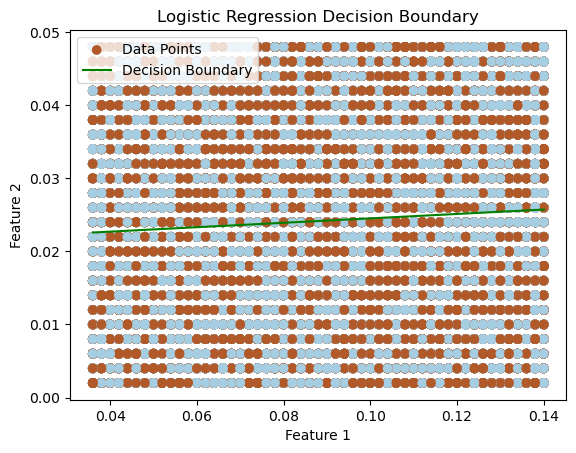

In [383]:
model.boudryLine()

In [344]:
Y_test

61727    1
53368    1
8925     0
77161    1
24049    1
        ..
24458    0
34209    0
72676    1
98286    1
20529    0
Name: Churn, Length: 30000, dtype: int64